# THE OUTLINE OF THE FINAL PROJECT

## About the topic

> After careful consideration，I make up my mind to do some exprience of classification about the digits. I searched a lot of material on the net, It seems that the digit classification is a topic which is worthy to try it out and neither too naive or complex. It is a traditional tasks to getting started with machine learning, just like the "hello world" in every language studying. And plenty of help I can get from others work.
    
> Another reason is that, I am ashamed about forgetting too much about calculus and probability theory. Besides I am just a freshman in machine learning. And there is not enough time for me to learn all of these algorithn during this summer school. So I won't choose the topic with complex Mathematical derivation, such as GP etc. But I will learn them later when I is not that busy. 
    
> The digits classification tasks can be deal with plenty of quite different ways. So even if it is simple using one approach, it is also challenging to compare about different ways we have to do with it. 

## About the dataset

1. we will use the small scale dataset which is a built-in dataset in sklearn.datasets at the begining 

2. we will come to the work of the large scale dataset : MNIST dataset, which contain the same thing as sklearn.datasets.digits.

## About the schedule

1. To begin with our work, we work to  import our dataset both MNIST and sklearn.dataset.digits

2. we do some simple classification using the bulit-in functions, and record their loss corresponding. Some methods we may use is listed as follows.

    2.1 we are going to use different method of KNeighborsClassifier.
    
    2.2 we are going to use KNN with different K values.
    
    2.3 we are going to use SVM which is a common choice to do classification
    
    2.4 we are going to use simple Neural Networks to do this classification.

3. we do some simple transform using the image analysis we have learned in class 10, then using the same way in step 2, and compared their results, figure out whether there is a obvious effect to do so.

4. we will do some Statistical analysis & data analysis to show which is the best way to deal with this classification task.

## connection with what we learn this summer 



In [22]:
import matplotlib.pylab as plt
import numpy as np

from sklearn import datasets

In [23]:
X_small_scale, Y_small_scale = datasets.load_digits(return_X_y=True)

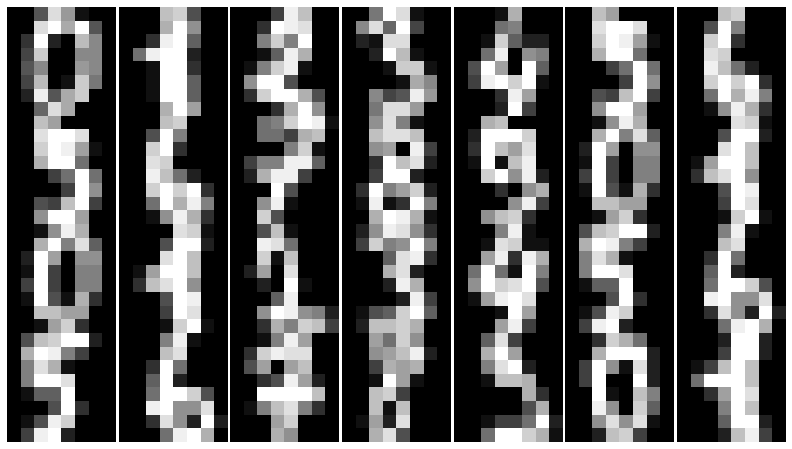

In [39]:
# show first 20 picture of the data
fig, axes = plt.subplots(4, 7, figsize = (14, 8))

plt.subplots_adjust(hspace=0, wspace=0)
for i in range(4):
    for j in range(7):
        image = X_small_scale[i*5+j].reshape(-1, 8)
        axes[i, j].imshow(image, cmap=cm.gray)
        axes[i, j].axis('off') #remove ticks

In [33]:
from sklearn.datasets import fetch_mldata
from sklearn import datasets
# import numpy as np

mnist = fetch_mldata('mnist-original', data_home = './datasets/') 
X_large_scale = mnist.data
Y_large_scale = mnist.target

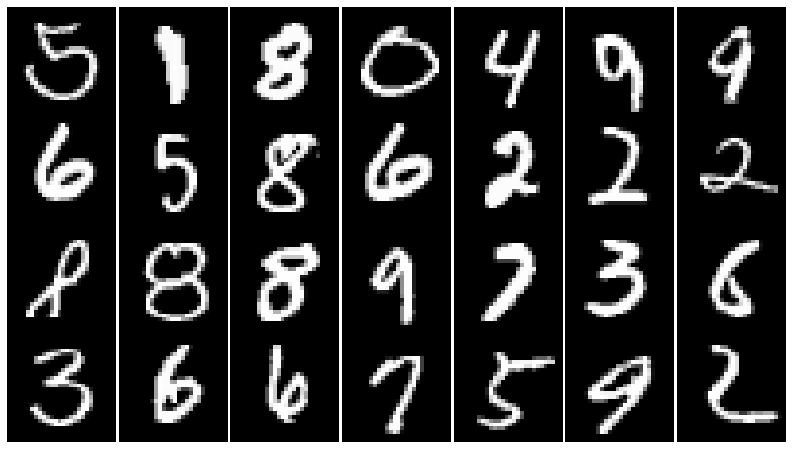

In [38]:
# show first 20 picture of the data
fig, axes = plt.subplots(4, 7, figsize = (14, 8))

plt.subplots_adjust(hspace=0, wspace=0)
for i in range(4):
    for j in range(7):
        rand = np.random.randint(0, len(Y_large_scale) - 1)
        image = X_large_scale[rand].reshape(-1, 28)
        axes[i, j].imshow(image, cmap=cm.gray)
        axes[i, j].axis('off') #remove ticks